In [1]:
#import necessary libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle



In [2]:
# Load the mpg dataset
data = sns.load_dataset('mpg')

# Check for missing values
print("Missing values before drop:")
print(data.isnull().sum())

# Drop missing values
data = data.dropna()

# Check missing values after drop
print("\nMissing values after drop:")
print(data.isnull().sum())



Missing values before drop:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

Missing values after drop:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


In [26]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,2,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,2,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,2,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,2,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,2,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,2,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,0,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,2,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,2,ford ranger


In [5]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin             int8
name             object
dtype: object

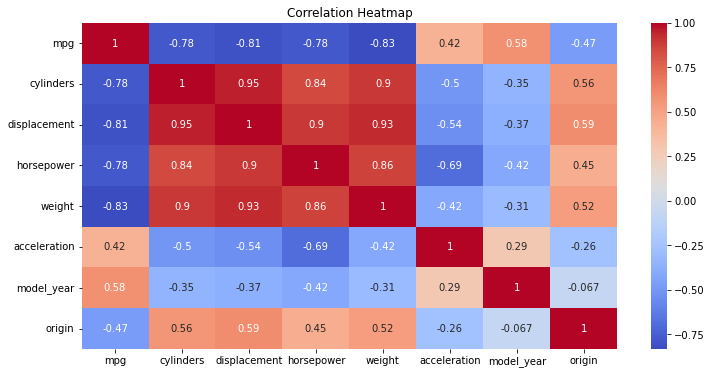

In [7]:
numeric_data = data.select_dtypes(include=['number'])

# Create visualizations
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



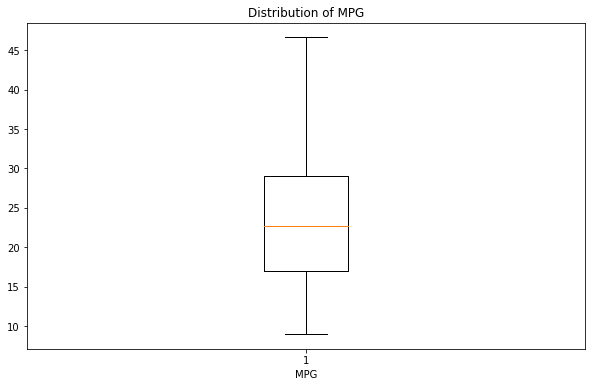

In [10]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['mpg'])
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.show()


C:\Users\ytrso\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ytrso\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


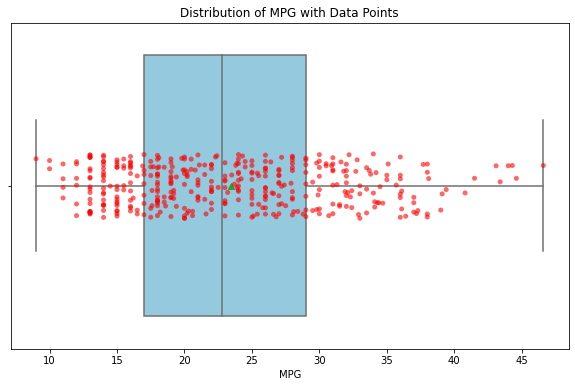

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['mpg'], color='skyblue', showmeans=True)
sns.stripplot(x=data['mpg'], color='red', alpha=0.6, jitter=True)  # Overlay data points
plt.title('Distribution of MPG with Data Points')
plt.xlabel('MPG')
plt.show()


In [18]:
# Define features and target variable
X = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']]
y = data['mpg']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8229144278736203
0.7924340895411551


In [13]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 10.594285130533121
R-squared: 0.7924340895411551


In [17]:
# Save the model using pickle
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved as 'linear_regression_model.pkl'")


Model saved as 'linear_regression_model.pkl'
